# The Math of Winning in Trading

The first thing that needs to be looked at is the mathematics of expectancy. This defines the interplay between the win ratio and the risk/reward ratio.

The expectancy is defined as

$$
\text{Expectancy} = (\text{Win Rate} \cdot \text{Average Win}) - (\text{Loss Rate}\cdot\text{Average Loss}).
$$

As an example of how this works, assume a 50% win rate with a risk/reward profile of 1:2. This means that we gain \\$2 per trade that we win and lose \\$1 for every losing trade. With the 50% win rate, the expectancy of a trade is \\$0.50 of profit.

It is important to note that this formula does not take slippage, commission drag or compounding into account. It also assumes a fixed risk/reward.

In [1]:
win_rate = 0.5
avg_win = 2
avg_loss = 1
expectancy = (win_rate * avg_win) - ((1 - win_rate) * avg_loss)
print(f"Expectancy is ${expectancy:.2f} per trade")

Expectancy is $0.50 per trade


## Expectancy Curve

The expectancy curve shows the inverse correlation of the risk/reward versus the win rate. Looking at the graph it can be seen that the more profit you shoot for, the more likely you'll lose.

In [2]:
%pip install numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
from matplotlib import pyplot as plt

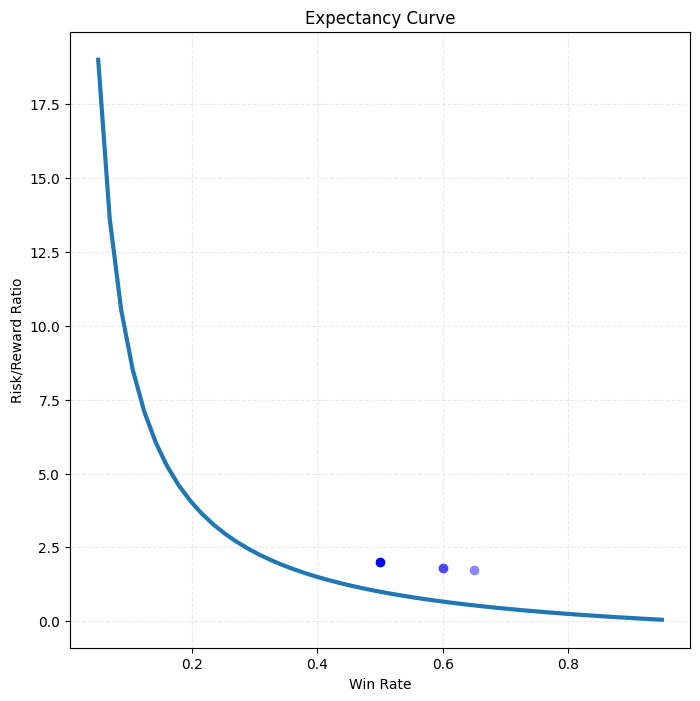

In [4]:
W = np.linspace(0.05, 0.95, 50)
y = 1 / W - 1 

plt.figure(figsize=(8, 8))
plt.plot(W, y, lw=3)
plt.grid(alpha=0.25,ls='--')
plt.xlabel('Win Rate')
plt.ylabel('Risk/Reward Ratio')
plt.title('Expectancy Curve')
plt.scatter(x=[0.5], y=[2], color='#0000ff')
plt.scatter(x=[0.6], y=[1.8], color='#4444ff')
plt.scatter(x=[0.65], y=[1.75], color='#8888ff')

## Losing Streaks

A losing streak is a number of trades that we lose in a row. From a probabilistic standpoint, at some point during trading you will encounter a losing trade. When this losing streak inevitably occurs, a large drawdown will happen to your portfolio. A simple estimation is calculated with

$$
\text{Estimated Losing Streak} = \ln \left( \text{Samples} \right) / \ln \left(1 - \text{Win Rate}\right).
$$

In [5]:
import pandas as pd

In [6]:
X = np.linspace(0.01, 0.99, 101-2)
samples = 50000
Y = np.log(samples) / np.log(1.0 - X*100)
#df = pd.DataFrame([X, Y], columns=["Win Rate", "Estimated Losing Streak"])

C:\Users\Darky\AppData\Local\Temp\ipykernel_4000\2221628456.py:3: RuntimeWarning: divide by zero encountered in log
  Y = np.log(samples) / np.log(1.0 - X*100)
C:\Users\Darky\AppData\Local\Temp\ipykernel_4000\2221628456.py:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(samples) / np.log(1.0 - X*100)


In [7]:
np.log(samples) / np.log(1.0 - X)

array([-1076.55887745,  -535.56080947,  -355.22192394,  -265.04776191,
        -210.93943007,  -174.86396265,  -149.09294457,  -129.76216725,
        -114.72484712,  -102.69291315,   -92.84668289,   -84.63970055,
         -77.69364976,   -71.7383038 ,   -66.57549565,   -62.05659931,
         -58.06795888,   -54.52117462,   -51.34645658,   -48.48797207,
         -45.90052255,   -43.54712666,   -41.39723394,   -39.42538494,
         -37.61019306,   -35.93356122,   -34.38007269,   -32.93651243,
         -31.59148741,   -30.33512297,   -29.15881782,   -28.05504508,
         -27.01718944,   -26.03941308,   -25.11654451,   -24.24398604,
         -23.41763616,   -22.63382421,   -21.8892551 ,   -21.18096231,
         -20.50626775,   -19.86274739,   -19.24820164,   -18.66062979,
         -18.09820782,   -17.55926918,   -17.04228787,   -16.54586383,
         -16.06870989,   -15.60964047,   -15.16756148,   -14.74146143,
         -14.3304035 ,   -13.93351854,   -13.54999875,   -13.17909207,
      

In [8]:
np.log(samples)

np.float64(10.819778284410283)

In [9]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


(3.75, 26.25)

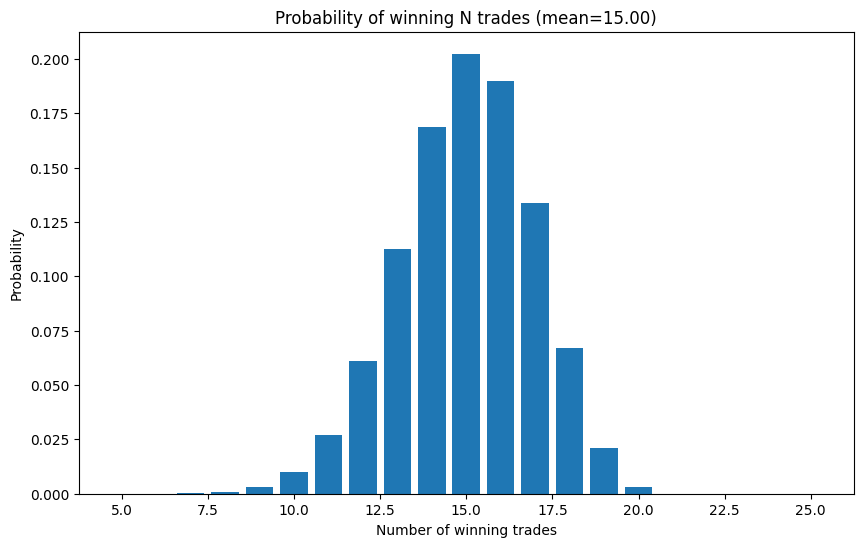

In [10]:
from scipy.stats import binom

n = 20
p = 0.75
r_values = list(range(n + 1))
mean, var = binom.stats(n, p)
dist = [binom.pmf(r, n, p) for r in r_values]

plt.figure(figsize=(10, 6))
plt.bar(r_values, dist)
plt.title(f'Probability of winning N trades (mean={mean:.2f})')
plt.xlabel('Number of winning trades')
plt.ylabel('Probability')
plt.gca().set_xlim([mean-3*var, mean+3*var])

In [11]:
binom.interval(0.95, n, p)

(np.float64(11.0), np.float64(18.0))

## Simulation

In [12]:
import random

In [13]:
balance = 1000
win_rate = 0.5
risk_reward = 2
risk = 0.01
n = 50

trades = []

for i in range(n):
    win = random.random() <= win_rate
    pre_balance = balance
    value_at_risk = balance * risk
    if win:
        balance += value_at_risk * risk_reward
    else:
        balance -= value_at_risk
        
    trades.append([win, pre_balance, balance])

df = pd.DataFrame(trades, columns=["Winning Trade", "Pre Balance", "Balance"])
df['Balance High Value'] = df['Balance'].cummax()
df['Drawdown'] = df['Balance'] / df['Balance High Value'] - 1.0

df

,Winning Trade,Pre Balance,Balance,Balance High Value,Drawdown
0,True,1000.000000,1020.000000,1020.000000,0.000000
1,True,1020.000000,1040.400000,1040.400000,0.000000
2,True,1040.400000,1061.208000,1061.208000,0.000000
3,True,1061.208000,1082.432160,1082.432160,0.000000
4,False,1082.432160,1071.607838,1082.432160,-0.010000
5,False,1071.607838,1060.891760,1082.432160,-0.019900
6,False,1060.891760,1050.282842,1082.432160,-0.029701
7,True,1050.282842,1071.288499,1082.432160,-0.010295
8,False,1071.288499,1060.575614,1082.432160,-0.020192
9,True,1060.575614,1081.787127,1082.432160,-0.000596


In [14]:
max_drawdown = df['Drawdown'].min()
end_balance = df.iloc[-1]['Balance']
profit = df.iloc[-1]['Balance'] / df.iloc[0]['Pre Balance'] - 1
end_balance, profit, max_drawdown

(np.float64(1166.780675159279),
 np.float64(0.16678067515927908),
 np.float64(-0.07807999352305806))

In [121]:
def simulate(balance, win_rate, risk_reward, risk, n):   
    trades = []
    
    for i in range(n):
        win = random.random() <= win_rate
        pre_balance = balance
        value_at_risk = balance * risk
        if win:
            balance += value_at_risk * risk_reward
        else:
            balance -= value_at_risk
        profit = balance - pre_balance
        trades.append([win, pre_balance, profit, balance])
    
    df = pd.DataFrame(trades, columns=["Winning Trade", "Pre Balance", "Profit", "Balance"])
    df['Drawdown'] = df['Balance'] / df['Balance'].cummax() - 1.0

    max_drawdown = abs(df['Drawdown'].min())
    end_balance = df.iloc[-1]['Balance']
    profit = df.iloc[-1]['Balance'] / df.iloc[0]['Pre Balance'] - 1
    
    return end_balance, profit, max_drawdown, df

In [122]:
b, pp, md, df = simulate(balance, win_rate, risk_reward, risk, n)
print(f"Balance = ${b:.2f}, Profit% = {pp*100:.2f}%, Max Drawdown = {abs(md*100):.2f}%")
df

Balance = $148892.69, Profit% = 48.89%, Max Drawdown = 6.88%


,Winning Trade,Pre Balance,Profit,Balance,Drawdown
0,True,100000.000000,2000.000000,102000.000000,0.000000
1,True,102000.000000,2040.000000,104040.000000,0.000000
2,False,104040.000000,-1040.400000,102999.600000,-0.010000
3,False,102999.600000,-1029.996000,101969.604000,-0.019900
4,False,101969.604000,-1019.696040,100949.907960,-0.029701
...,...,...,...,...,...
95,False,143153.668545,-1431.536685,141722.131859,-0.039976
96,False,141722.131859,-1417.221319,140304.910540,-0.049577
97,True,140304.910540,2806.098211,143111.008751,-0.030568
98,True,143111.008751,2862.220175,145973.228926,-0.011180


## Simulate N trades M times

The idea behind simulating N trades M times is to find confidence intervals for the end balance, profit %, and the maximum drawdown. Maximum drawdown is especially important in this case.

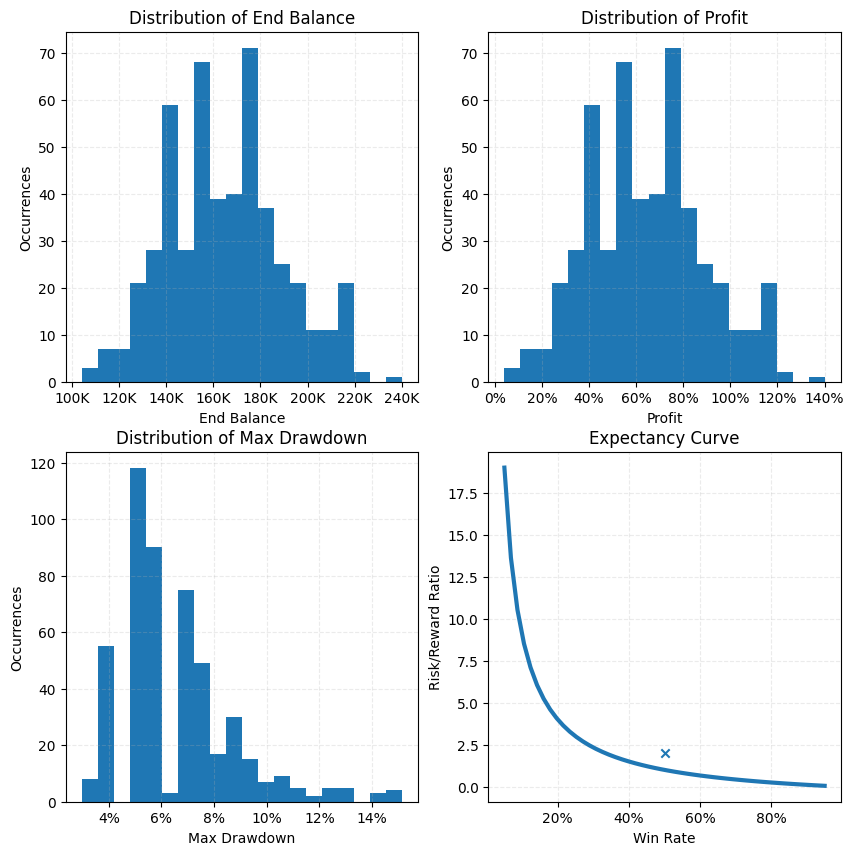

In [145]:
balance = 100000
win_rate = 0.5
risk_reward = 2
risk = 0.01
n = 100

n_sims = 500
results = []

for i in range(n_sims):
    b, pp, md, _ = simulate(balance, win_rate, risk_reward, risk, n)
    results.append((b, pp, md))
    
df = pd.DataFrame(results, columns=["End Balance", "Profit%", "Max Drawdown"])

from matplotlib.ticker import (FuncFormatter) 

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].hist(df['End Balance'], bins=20)
ax[0, 0].set_title('Distribution of End Balance')
ax[0, 0].set_xlabel('End Balance')
ax[0, 0].set_ylabel('Occurrences')
ax[0, 0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{(x / 1000):1.0f}K"))
ax[0, 0].grid(alpha=0.25, ls='--')

ax[0, 1].hist((df['Profit%'])*100, bins=20)
ax[0, 1].set_title('Distribution of Profit')
ax[0, 1].set_xlabel('Profit')
ax[0, 1].set_ylabel('Occurrences')
ax[0, 1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: "%1.0f%%" % x))
ax[0, 1].grid(alpha=0.25, ls='--')

ax[1, 0].hist(abs(df['Max Drawdown'])*100, bins=20)
ax[1, 0].set_title('Distribution of Max Drawdown')
ax[1, 0].set_xlabel('Max Drawdown')
ax[1, 0].set_ylabel('Occurrences')
ax[1, 0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: "%1.0f%%" % x))
ax[1, 0].grid(alpha=0.25, ls='--')

W = np.linspace(0.05, 0.95, 50)
y = 1 / W - 1 

ax[1, 1].plot(W, y, lw=3)
ax[1, 1].set_xlabel('Win Rate')
ax[1, 1].set_ylabel('Risk/Reward Ratio')
ax[1, 1].set_title('Expectancy Curve')
ax[1, 1].scatter(x=[win_rate], y=[risk_reward], marker='x')
ax[1, 1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{100*x:1.0f}%"))
ax[1, 1].grid(alpha=0.25, ls='--')

## Simulate N trades M times AB test

This is the same as above, but for two type of simulation. These are then compared with each other to see the effect of a change in a parameter.

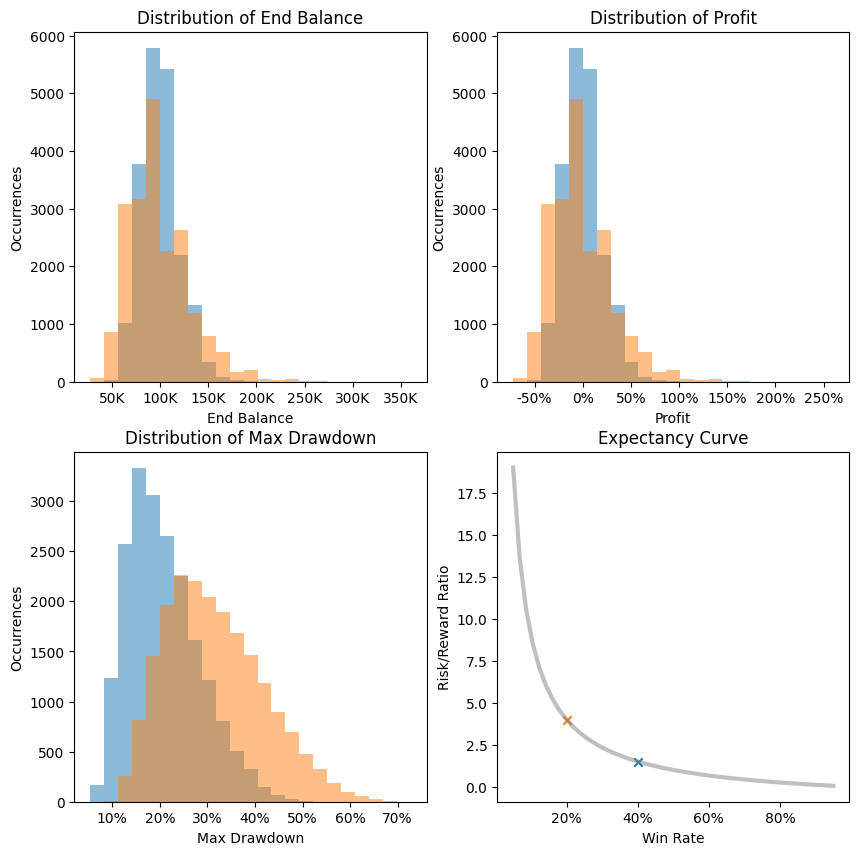

In [161]:
balance = 100000

risk_reward_a = 1.5
win_rate_a = 1 / (risk_reward_a + 1.0)
risk_a = 0.01

risk_reward_b = 4.0
win_rate_b = 1 / (risk_reward_b + 1.0)
risk_b = 0.01

n = 250
n_sims = 20000
results_a = []
results_b = []

n_bins = 24

for i in range(n_sims):
    b_a, pp_a, md_a, _ = simulate(balance, win_rate_a, risk_reward_a, risk_a, n)
    results_a.append((b_a, pp_a, md_a))
    
    b_b, pp_b, md_b, _ = simulate(balance, win_rate_b, risk_reward_b, risk_b, n)
    results_b.append((b_b, pp_b, md_b))
    
df_a = pd.DataFrame(results_a, columns=["End Balance", "Profit%", "Max Drawdown"])
df_b = pd.DataFrame(results_b, columns=["End Balance", "Profit%", "Max Drawdown"])

from matplotlib.ticker import (FuncFormatter) 

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

bins = np.linspace(
    min(df_a['End Balance'].min(), df_b['End Balance'].min()),
    max(df_a['End Balance'].max(), df_b['End Balance'].max()),
    n_bins)
ax[0, 0].hist(df_a['End Balance'], bins, alpha=0.5)
ax[0, 0].hist(df_b['End Balance'], bins, alpha=0.5)
ax[0, 0].set_title('Distribution of End Balance')
ax[0, 0].set_xlabel('End Balance')
ax[0, 0].set_ylabel('Occurrences')
ax[0, 0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{(x / 1000):1.0f}K"))

bins = np.linspace(
    min(df_a['Profit%'].min(), df_b['Profit%'].min()),
    max(df_a['Profit%'].max(), df_b['Profit%'].max()),
    n_bins)
ax[0, 1].hist(df_a['Profit%'], bins, alpha=0.5)
ax[0, 1].hist(df_b['Profit%'], bins, alpha=0.5)
ax[0, 1].set_title('Distribution of Profit')
ax[0, 1].set_xlabel('Profit')
ax[0, 1].set_ylabel('Occurrences')
ax[0, 1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{100*x:1.0f}%"))

bins = np.linspace(
    min(df_a['Max Drawdown'].min(), df_b['Max Drawdown'].min()),
    max(df_a['Max Drawdown'].max(), df_b['Max Drawdown'].max()),
    n_bins)
ax[1, 0].hist(df_a['Max Drawdown'], bins, alpha=0.5)
ax[1, 0].hist(df_b['Max Drawdown'], bins, alpha=0.5)
ax[1, 0].set_title('Distribution of Max Drawdown')
ax[1, 0].set_xlabel('Max Drawdown')
ax[1, 0].set_ylabel('Occurrences')
ax[1, 0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{100*x:1.0f}%"))

W = np.linspace(0.05, 0.95, 50)
y = 1 / W - 1 

ax[1, 1].plot(W, y, color='grey', lw=3, alpha=0.5)
ax[1, 1].set_xlabel('Win Rate')
ax[1, 1].set_ylabel('Risk/Reward Ratio')
ax[1, 1].set_title('Expectancy Curve')
ax[1, 1].scatter(x=[win_rate_a], y=[risk_reward_a], marker='x')
ax[1, 1].scatter(x=[win_rate_b], y=[risk_reward_b], marker='x')
ax[1, 1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{100*x:1.0f}%"))

## Simulate N trades

In [50]:
_, _, _, df = simulate(100000, 0.5, 2, 0.01, 100)

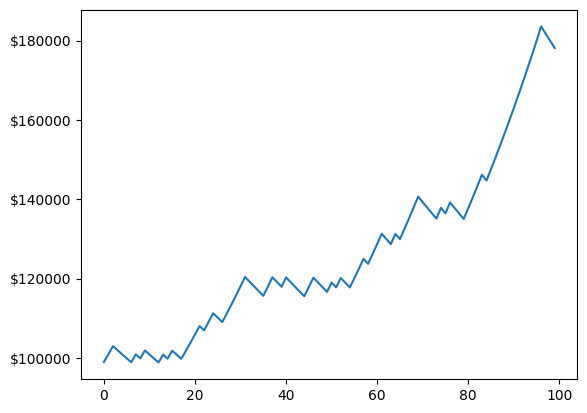

In [51]:
from matplotlib.ticker import (MultipleLocator, 
                               FormatStrFormatter, 
                               FuncFormatter,
                               AutoMinorLocator) 

plt.plot(df['Balance'])
ax = plt.gca()
# ax.yaxis.set_major_locator(MultipleLocator(200000)) 
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: "$%1.0f" % x)) 

<BarContainer object of 500 artists>

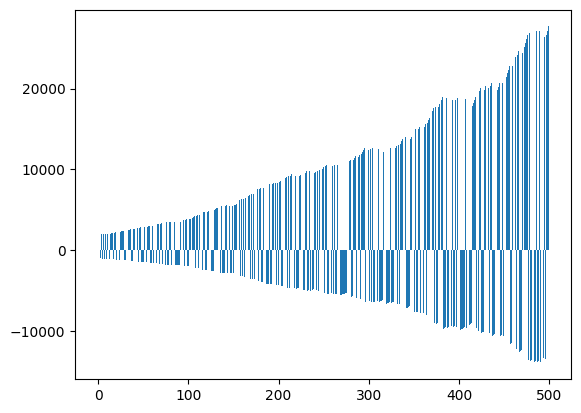

In [23]:
plt.bar(df.index, df['Profit'])

<BarContainer object of 500 artists>

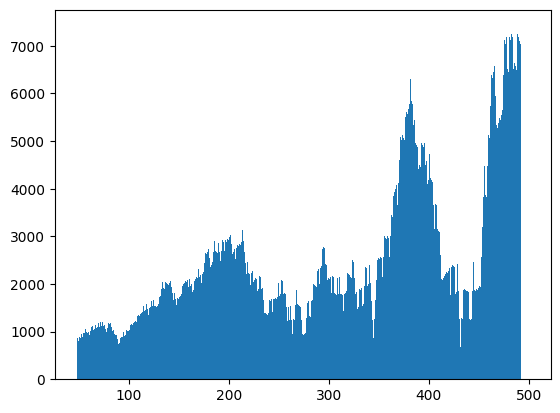

In [24]:
df['Profit SMA'] = df['Profit'].rolling(50).mean()
plt.bar(df.index, df['Profit SMA'])

In [25]:
avg_profit = df[df['Profit'] > 0]['Profit'].mean()
avg_loss = df[df['Profit'] < 0]['Profit'].mean()

In [26]:
avg_profit, avg_loss

(np.float64(10793.387547492353), np.float64(-6019.238896631885))

In [27]:
profit_factor = abs(avg_profit / avg_loss)
profit_factor

np.float64(1.7931482256887799)

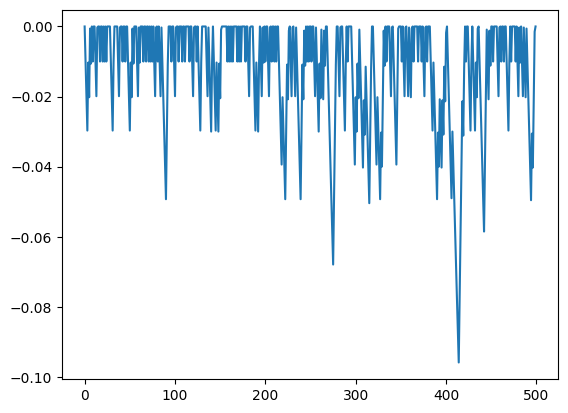

In [28]:
plt.plot(df['Drawdown'])

Text(0.5, 1.0, 'Violin plot of Profit')

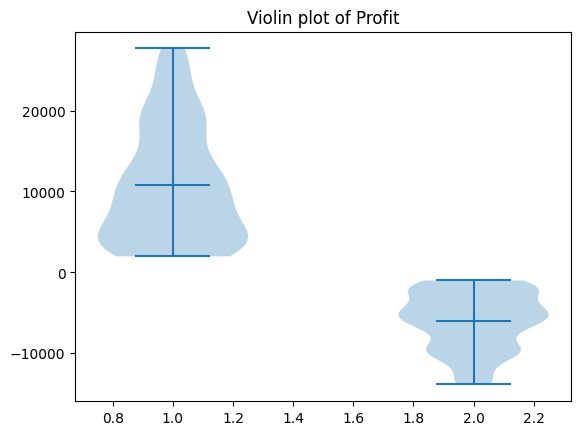

In [29]:
plt.violinplot([
    df[df['Profit'] > 0]['Profit'],
    df[df['Profit'] < 0]['Profit']
], showmeans=True)
plt.title('Violin plot of Profit')

In [30]:
df['Profit'] / df['Pre Balance']

0      0.02
1     -0.01
2     -0.01
3     -0.01
4      0.02
       ... 
495    0.02
496   -0.01
497    0.02
498    0.02
499    0.02
Length: 500, dtype: float64

## Stop Loss Management

* When we are in profit 25% of our expected objective, stop loss can be reduced by 25%.
* When we are in profit 50% of our expected objective, stop loss can be reduced by 50%.
* When the position is at 75% of the expected profit objective, stop must be at break-even.

## Money Management

Position Size is calculated as

$$
\text{Position Size} = \dfrac{ \text{Account Equity} \times \text{R\%} }{ \text{Entry} - \text{Stop Loss} }
$$

where

  * Account Equity is the total balance in the account.
  * R% is the percentage of total equity lost, i.e. risk.
  * Entry is the price where the market is entered.
  * Stop Loss is the price where the market is exited if the trade fails.
    

In [189]:
account_equity = 100000
risk = 0.01
entry = 50000
take_profit = 55000
stop_loss = 47500
position_size = account_equity * risk / (entry - stop_loss)

position_size

0.4

In [188]:
print(f"{position_size:.2f} = {account_equity} * {risk:.2f} / ({entry} - {stop_loss})")
print(f"{position_size:.2f} = {account_equity * risk:.2f} / {entry - stop_loss}")

0.40 = 100000 * 0.01 / (50000 - 47500)
0.40 = 1000.00 / 2500


A losing trade is calculated as

In [191]:
0.40 * stop_loss - 0.40 * entry 

-1000.0

which verifies that we will lose exactly what is defined by our $\text R\%$, which is $\$1000$.

If the account takes a loss on a trade, and it is the full R% assumed:

 1. Drop the R% by 50% and when the loss is recovered by 50%, you are permitted to return to the maximum R% per trade.
 2. If the reduced R% trade assumes a loss, reduce the R% by another 50% until the previous trade loss is recovered by 50%.

If you take a series of five winning trades in a row, drop your R% by 50%. You are likely to assume a loss, eventually, and this will build in equity leveling and reduce the likelihood of a large drawdown. You want a smooth equity curve that slopes or stair-steps higher. Not a jagger roller coaster with deep declines.  

* https://www.youtube.com/watch?v=jm55pm_ZIdI